In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
dataset = pd.read_csv(r"C:\Users\ismai\Downloads\archive (14)\Frequency Features\frequencyFeatures.csv")

In [3]:
dataset.head()

,ID,Label,Timestamp,xAcc010Hz,xAcc015Hz,xAcc020Hz,xAcc025Hz,xAcc030Hz,xAcc035Hz,xAcc040Hz,...,snd2275Hz,snd2300Hz,snd2325Hz,snd2350Hz,snd2375Hz,snd2400Hz,snd2425Hz,snd2450Hz,snd2475Hz,snd2500Hz
0,1,off,0.00,10.559710,9.695637,2.036690,2.288568,2.565607,2.312750,3.991020,...,0.004249,0.099368,0.012296,0.008071,0.005442,0.026792,0.013993,0.031688,0.007489,0.013386
1,1,off,0.04,2.420781,7.811703,2.076250,2.885846,2.186312,1.296386,2.937785,...,0.013465,0.089160,0.018883,0.018947,0.010409,0.013679,0.017798,0.018390,0.018145,0.007316
2,1,off,0.08,4.148815,6.011957,4.847633,1.743515,1.342447,2.574446,2.829619,...,0.016140,0.075694,0.025835,0.017859,0.015873,0.004619,0.032514,0.008647,0.034637,0.005606
3,1,off,0.12,1.893998,4.014839,9.151205,5.658958,3.151961,3.148572,5.322784,...,0.007497,0.072591,0.031014,0.008861,0.017935,0.000610,0.046791,0.006037,0.028448,0.014418
4,1,off,0.16,7.347695,7.796385,13.865880,11.953800,7.163614,3.821749,9.075362,...,0.019350,0.066571,0.028685,0.034594,0.016541,0.018063,0.035644,0.007217,0.014886,0.024236


In [27]:
dataset['Label'].value_counts()

Label
off    250
on     250
cap    250
out    250
unb    250
c25    250
c75    250
vnt    250
Name: count, dtype: int64

In [5]:
dataset['Label'].value_counts()

Label
off    250
on     250
cap    250
out    250
unb    250
c25    250
c75    250
vnt    250
Name: count, dtype: int64

In [6]:
dataset.dtypes

ID             int64
Label         object
Timestamp    float64
xAcc010Hz    float64
xAcc015Hz    float64
              ...   
snd2400Hz    float64
snd2425Hz    float64
snd2450Hz    float64
snd2475Hz    float64
snd2500Hz    float64
Length: 172, dtype: object

In [8]:
dataset.describe()

,ID,Timestamp,xAcc010Hz,xAcc015Hz,xAcc020Hz,xAcc025Hz,xAcc030Hz,xAcc035Hz,xAcc040Hz,xAcc045Hz,...,snd2275Hz,snd2300Hz,snd2325Hz,snd2350Hz,snd2375Hz,snd2400Hz,snd2425Hz,snd2450Hz,snd2475Hz,snd2500Hz
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.500000,4.98000,522.019431,523.387327,1891.988030,3255.503387,1224.843088,536.530298,913.998457,8050.383320,...,2.658048,3.441290,4.510671,3.748772,2.405819,2.519180,3.047706,2.478341,2.301676,2.360408
std,2.291861,2.88745,362.847335,382.848242,1325.152382,2366.281467,853.525325,381.652210,605.179654,3248.083644,...,1.967979,2.532960,3.261445,2.854109,1.809216,1.855343,2.137708,1.836134,1.635554,1.775470
min,1.000000,0.00000,0.860118,0.171837,0.241749,0.109468,0.611603,0.223578,0.338449,0.260764,...,0.000652,0.001106,0.001537,0.001241,0.001167,0.000610,0.000393,0.000945,0.000928,0.000832
25%,2.750000,2.48000,258.788677,246.867055,550.324718,704.832990,467.001198,258.296968,493.043490,7976.805113,...,1.228375,1.588123,2.243414,1.734544,1.097061,1.194266,1.612142,1.184536,1.114807,1.080754
50%,4.500000,4.98000,494.537080,476.607805,2048.532680,3644.992941,1231.269622,508.453318,889.757772,8838.382312,...,2.457448,3.116606,4.049470,3.439695,2.194696,2.282254,2.905644,2.279328,2.205291,2.122410
75%,6.250000,7.48000,740.540221,731.179443,3088.646901,5567.720244,1914.687937,757.806707,1292.353761,9698.308373,...,3.748314,4.887541,6.415730,5.294756,3.420040,3.624667,4.315301,3.491560,3.270956,3.394977
max,8.000000,9.96000,1949.843492,2620.274174,5192.150571,7166.899371,3621.140216,2637.888164,3019.773293,13192.317600,...,15.108193,14.055144,20.525547,22.310031,15.978698,12.135809,15.715948,14.120113,13.632536,10.342633


In [9]:
list(dataset.columns)

['ID',
 'Label',
 'Timestamp',
 'xAcc010Hz',
 'xAcc015Hz',
 'xAcc020Hz',
 'xAcc025Hz',
 'xAcc030Hz',
 'xAcc035Hz',
 'xAcc040Hz',
 'xAcc045Hz',
 'xAcc050Hz',
 'xAcc055Hz',
 'xAcc060Hz',
 'xAcc065Hz',
 'xAcc070Hz',
 'xAcc075Hz',
 'xAcc080Hz',
 'xAcc085Hz',
 'xAcc090Hz',
 'xAcc095Hz',
 'xAcc100Hz',
 'xAcc105Hz',
 'xAcc110Hz',
 'xAcc115Hz',
 'xAcc120Hz',
 'yAcc010Hz',
 'yAcc015Hz',
 'yAcc020Hz',
 'yAcc025Hz',
 'yAcc030Hz',
 'yAcc035Hz',
 'yAcc040Hz',
 'yAcc045Hz',
 'yAcc050Hz',
 'yAcc055Hz',
 'yAcc060Hz',
 'yAcc065Hz',
 'yAcc070Hz',
 'yAcc075Hz',
 'yAcc080Hz',
 'yAcc085Hz',
 'yAcc090Hz',
 'yAcc095Hz',
 'yAcc100Hz',
 'yAcc105Hz',
 'yAcc110Hz',
 'yAcc115Hz',
 'yAcc120Hz',
 'zAcc010Hz',
 'zAcc015Hz',
 'zAcc020Hz',
 'zAcc025Hz',
 'zAcc030Hz',
 'zAcc035Hz',
 'zAcc040Hz',
 'zAcc045Hz',
 'zAcc050Hz',
 'zAcc055Hz',
 'zAcc060Hz',
 'zAcc065Hz',
 'zAcc070Hz',
 'zAcc075Hz',
 'zAcc080Hz',
 'zAcc085Hz',
 'zAcc090Hz',
 'zAcc095Hz',
 'zAcc100Hz',
 'zAcc105Hz',
 'zAcc110Hz',
 'zAcc115Hz',
 'zAcc120Hz',
 's

In [11]:
accelerometer_data = dataset[['ID',
 'Label',
 'Timestamp',
 'xAcc010Hz',
 'xAcc015Hz',
 'xAcc020Hz',
 'xAcc025Hz',
 'xAcc030Hz',
 'xAcc035Hz',
 'xAcc040Hz',
 'xAcc045Hz',
 'xAcc050Hz',
 'xAcc055Hz',
 'xAcc060Hz',
 'xAcc065Hz',
 'xAcc070Hz',
 'xAcc075Hz',
 'xAcc080Hz',
 'xAcc085Hz',
 'xAcc090Hz',
 'xAcc095Hz',
 'xAcc100Hz',
 'xAcc105Hz',
 'xAcc110Hz',
 'xAcc115Hz',
 'xAcc120Hz',
 'yAcc010Hz',
 'yAcc015Hz',
 'yAcc020Hz',
 'yAcc025Hz',
 'yAcc030Hz',
 'yAcc035Hz',
 'yAcc040Hz',
 'yAcc045Hz',
 'yAcc050Hz',
 'yAcc055Hz',
 'yAcc060Hz',
 'yAcc065Hz',
 'yAcc070Hz',
 'yAcc075Hz',
 'yAcc080Hz',
 'yAcc085Hz',
 'yAcc090Hz',
 'yAcc095Hz',
 'yAcc100Hz',
 'yAcc105Hz',
 'yAcc110Hz',
 'yAcc115Hz',
 'yAcc120Hz',
 'zAcc010Hz',
 'zAcc015Hz',
 'zAcc020Hz',
 'zAcc025Hz',
 'zAcc030Hz',
 'zAcc035Hz',
 'zAcc040Hz',
 'zAcc045Hz',
 'zAcc050Hz',
 'zAcc055Hz',
 'zAcc060Hz',
 'zAcc065Hz',
 'zAcc070Hz',
 'zAcc075Hz',
 'zAcc080Hz',
 'zAcc085Hz',
 'zAcc090Hz',
 'zAcc095Hz',
 'zAcc100Hz',
 'zAcc105Hz',
 'zAcc110Hz',
 'zAcc115Hz',
 'zAcc120Hz']]

In [17]:
accelerometer_corr = accelerometer_data.drop(['ID','Label','Timestamp'],axis = 1).corr()

In [23]:
accelerometer_corr

,xAcc010Hz,xAcc015Hz,xAcc020Hz,xAcc025Hz,xAcc030Hz,xAcc035Hz,xAcc040Hz,xAcc045Hz,xAcc050Hz,xAcc055Hz,...,zAcc075Hz,zAcc080Hz,zAcc085Hz,zAcc090Hz,zAcc095Hz,zAcc100Hz,zAcc105Hz,zAcc110Hz,zAcc115Hz,zAcc120Hz
xAcc010Hz,1.000000,0.504077,0.296292,0.293496,0.315623,0.367566,0.343559,0.497517,0.496158,0.395207,...,0.312305,0.311082,0.332745,0.327406,0.312947,0.317232,0.302790,0.280281,0.299756,0.346002
xAcc015Hz,0.504077,1.000000,0.358511,0.300426,0.323082,0.379446,0.261075,0.457403,0.468893,0.378357,...,0.288211,0.301420,0.303216,0.277256,0.249936,0.244654,0.265493,0.241854,0.299555,0.330113
xAcc020Hz,0.296292,0.358511,1.000000,0.953946,0.807753,0.356290,0.123493,0.367385,0.533222,0.590291,...,0.751995,0.388464,0.367356,0.415129,0.222368,0.157445,0.177303,0.291543,0.337676,0.417472
xAcc025Hz,0.293496,0.300426,0.953946,1.000000,0.892885,0.340388,0.082311,0.336203,0.520574,0.602304,...,0.788636,0.383811,0.358473,0.411201,0.192058,0.116685,0.152344,0.292912,0.322935,0.409150
xAcc030Hz,0.315623,0.323082,0.807753,0.892885,1.000000,0.388377,0.122617,0.371972,0.526935,0.567921,...,0.713730,0.384733,0.359084,0.403536,0.216908,0.165663,0.188132,0.304605,0.327327,0.398135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zAcc100Hz,0.317232,0.244654,0.157445,0.116685,0.165663,0.267506,0.451050,0.639604,0.565730,0.387957,...,0.203422,0.302907,0.302160,0.321464,0.733144,1.000000,0.608458,0.355026,0.366832,0.312415
zAcc105Hz,0.302790,0.265493,0.177303,0.152344,0.188132,0.282781,0.375563,0.570453,0.545320,0.428853,...,0.236966,0.300754,0.306187,0.278623,0.352644,0.608458,1.000000,0.530894,0.369146,0.302388
zAcc110Hz,0.280281,0.241854,0.291543,0.292912,0.304605,0.307877,0.319889,0.535558,0.556047,0.483166,...,0.347496,0.321130,0.324856,0.287573,0.322690,0.355026,0.530894,1.000000,0.562449,0.325986
zAcc115Hz,0.299756,0.299555,0.337676,0.322935,0.327327,0.312431,0.334678,0.546245,0.564243,0.469227,...,0.369146,0.346165,0.342184,0.324161,0.330719,0.366832,0.369146,0.562449,1.000000,0.590880


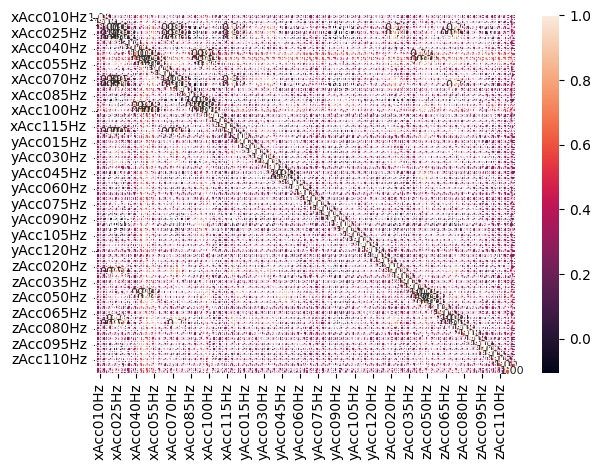

In [22]:
sns.heatmap(accelerometer_corr,annot=True,fmt=".2f",
    annot_kws={"size": 8})
plt.tight_layout()
plt.show()

In [29]:
pca = PCA(n_components=10)

In [36]:
pc_data = pca.fit_transform(accelerometer_data.drop(['ID','Label','Timestamp'],axis = 1))

In [35]:
print(pc_data.explained_variance_ratio_)

[0.61347232 0.11912018 0.04838246 0.02218591 0.01601638 0.01478892
 0.00930642 0.00899035 0.00714136 0.00644431]


In [38]:
pc_data.shape

(2000, 10)

In [42]:
pc_df = pd.DataFrame(pc_data, columns=[f'PC{i+1}' for i in range(10)])
pc_df['Label'] = accelerometer_data['Label']
#pc_df['ID'] = accelerometer_data['ID']  # optional


In [43]:
explained_variance = pca.explained_variance_ratio_
print("Variance per PC:", explained_variance)
print("Total variance explained:", explained_variance.sum())


Variance per PC: [0.61347232 0.11912018 0.04838246 0.02218591 0.01601638 0.01478892
 0.00930642 0.00899035 0.00714136 0.00644431]
Total variance explained: 0.8658485887743714


In [44]:
from sklearn.model_selection import train_test_split

X = pc_df.drop('Label', axis=1)
y = pc_df['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         c25       0.57      0.56      0.57        50
         c75       0.58      0.60      0.59        50
         cap       0.92      0.94      0.93        50
         off       1.00      1.00      1.00        50
          on       0.95      0.84      0.89        50
         out       0.87      0.96      0.91        50
         unb       0.86      0.84      0.85        50
         vnt       1.00      1.00      1.00        50

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



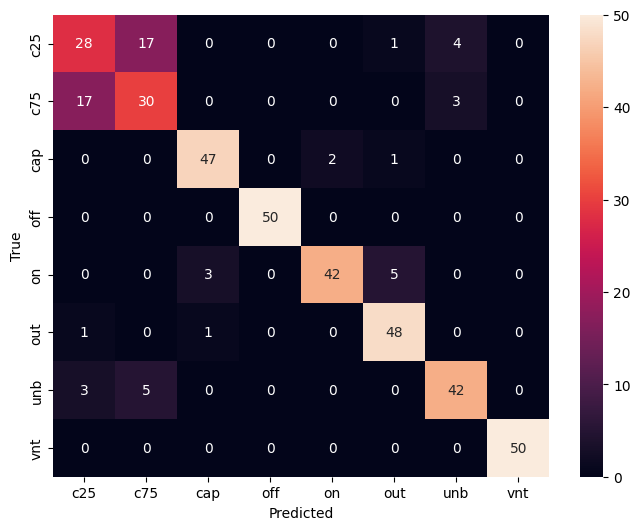

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


              precision    recall  f1-score   support

         c25       0.55      0.48      0.51        50
         c75       0.58      0.64      0.61        50
         cap       0.96      0.98      0.97        50
         off       1.00      1.00      1.00        50
          on       1.00      0.94      0.97        50
         out       0.94      0.96      0.95        50
         unb       0.85      0.88      0.86        50
         vnt       1.00      1.00      1.00        50

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



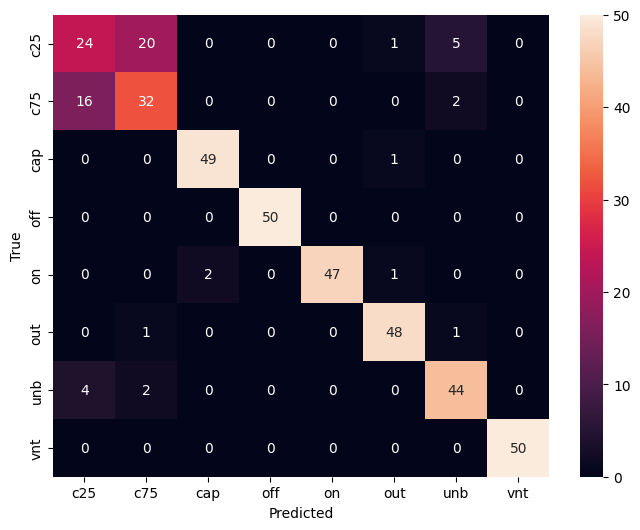

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

              precision    recall  f1-score   support

         c25       0.55      0.58      0.56        50
         c75       0.61      0.54      0.57        50
         cap       0.96      0.96      0.96        50
         off       1.00      1.00      1.00        50
          on       1.00      0.96      0.98        50
         out       0.94      0.98      0.96        50
         unb       0.83      0.88      0.85        50
         vnt       1.00      1.00      1.00        50

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



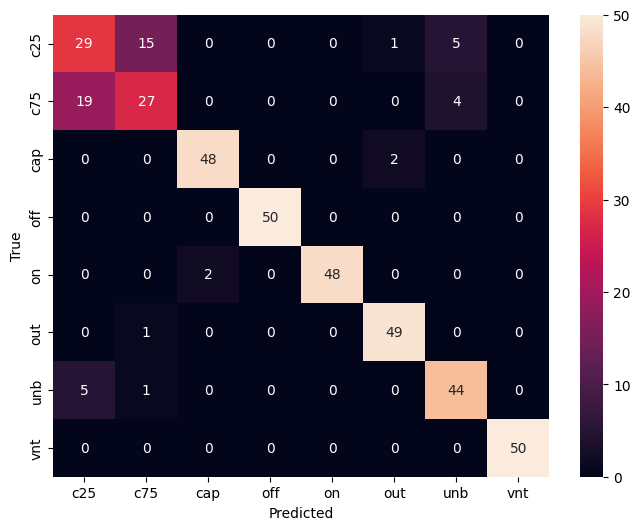

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


clf = XGBClassifier(random_state=42)
clf.fit(X_train, y_train_enc)

y_pred_enc = clf.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)


print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

              precision    recall  f1-score   support

         c25       0.59      0.52      0.55        50
         c75       0.62      0.68      0.65        50
         cap       0.96      0.96      0.96        50
         off       1.00      1.00      1.00        50
          on       1.00      0.96      0.98        50
         out       0.96      0.98      0.97        50
         unb       0.87      0.90      0.88        50
         vnt       1.00      1.00      1.00        50

    accuracy                           0.88       400
   macro avg       0.87      0.88      0.87       400
weighted avg       0.87      0.88      0.87       400



TypeError: '<' not supported between instances of 'int' and 'str'

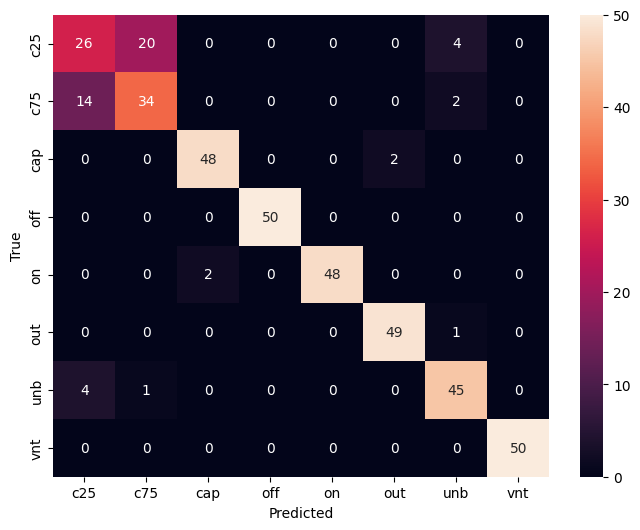

In [52]:
y_pred = le.inverse_transform(y_pred_enc)
y_test_orig = y_test  # original string labels

cm = confusion_matrix(y_test_orig, y_pred, labels=le.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [61]:
microphone_data = dataset[['Label','snd0025Hz',
 'snd0050Hz',
 'snd0075Hz',
 'snd0100Hz',
 'snd0125Hz',
 'snd0150Hz',
 'snd0175Hz',
 'snd0200Hz',
 'snd0225Hz',
 'snd0250Hz',
 'snd0275Hz',
 'snd0300Hz',
 'snd0325Hz',
 'snd0350Hz',
 'snd0375Hz',
 'snd0400Hz',
 'snd0425Hz',
 'snd0450Hz',
 'snd0475Hz',
 'snd0500Hz',
 'snd0525Hz',
 'snd0550Hz',
 'snd0575Hz',
 'snd0600Hz',
 'snd0625Hz',
 'snd0650Hz',
 'snd0675Hz',
 'snd0700Hz',
 'snd0725Hz',
 'snd0750Hz',
 'snd0775Hz',
 'snd0800Hz',
 'snd0825Hz',
 'snd0850Hz',
 'snd0875Hz',
 'snd0900Hz',
 'snd0925Hz',
 'snd0950Hz',
 'snd0975Hz',
 'snd1000Hz',
 'snd1025Hz',
 'snd1050Hz',
 'snd1075Hz',
 'snd1100Hz',
 'snd1125Hz',
 'snd1150Hz',
 'snd1175Hz',
 'snd1200Hz',
 'snd1225Hz',
 'snd1250Hz',
 'snd1275Hz',
 'snd1300Hz',
 'snd1325Hz',
 'snd1350Hz',
 'snd1375Hz',
 'snd1400Hz',
 'snd1425Hz',
 'snd1450Hz',
 'snd1475Hz',
 'snd1500Hz',
 'snd1525Hz',
 'snd1550Hz',
 'snd1575Hz',
 'snd1600Hz',
 'snd1625Hz',
 'snd1650Hz',
 'snd1675Hz',
 'snd1700Hz',
 'snd1725Hz',
 'snd1750Hz',
 'snd1775Hz',
 'snd1800Hz',
 'snd1825Hz',
 'snd1850Hz',
 'snd1875Hz',
 'snd1900Hz',
 'snd1925Hz',
 'snd1950Hz',
 'snd1975Hz',
 'snd2000Hz',
 'snd2025Hz',
 'snd2050Hz',
 'snd2075Hz',
 'snd2100Hz',
 'snd2125Hz',
 'snd2150Hz',
 'snd2175Hz',
 'snd2200Hz',
 'snd2225Hz',
 'snd2250Hz',
 'snd2275Hz',
 'snd2300Hz',
 'snd2325Hz',
 'snd2350Hz',
 'snd2375Hz',
 'snd2400Hz',
 'snd2425Hz',
 'snd2450Hz',
 'snd2475Hz',
 'snd2500Hz']]

In [57]:
pca1 = PCA(n_components=10)

In [62]:
mrf_data = pca1.fit_transform(microphone_data.drop('Label',axis = 1))

In [63]:
mrf_data.shape

(2000, 10)

In [74]:
mrf_data = pd.DataFrame(mrf_data, columns=[f'PC{i+1}' for i in range(10)])
mrf_data['Label'] = microphone_data['Label']



In [75]:
explained_variance = pca1.explained_variance_ratio_
print("Variance per PC:", explained_variance)
print("Total variance explained:", explained_variance.sum())


Variance per PC: [0.35680124 0.07214212 0.05270364 0.04412094 0.03703707 0.03473442
 0.0277275  0.0237955  0.02288289 0.02072179]
Total variance explained: 0.6926671094783552


In [76]:
mrf_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Label
0,-61.463041,4.127800,2.256528,0.267907,2.359801,2.806751,0.092786,-1.110617,0.837464,0.824991,off
1,-61.449474,4.175338,2.254960,0.266936,2.356692,2.805433,0.100441,-1.074356,0.861143,0.822271,off
2,-61.428016,4.160285,2.304538,0.249634,2.368074,2.788270,0.101230,-1.065238,0.856821,0.825934,off
3,-61.403878,4.128699,2.308821,0.220091,2.363359,2.800235,0.091760,-1.077500,0.841572,0.811188,off
4,-61.407883,4.146769,2.290354,0.211017,2.349200,2.821266,0.074077,-1.102117,0.852400,0.785670,off
...,...,...,...,...,...,...,...,...,...,...,...
1995,6.892834,1.485902,-13.296495,-6.720633,-15.400592,-0.144244,8.770239,1.677820,4.394456,-3.576884,vnt
1996,12.908172,-2.314254,-10.299598,-1.656940,8.262431,6.675904,-5.955443,3.044570,-5.917037,-11.056447,vnt
1997,19.539134,-1.982705,-13.201661,1.768096,11.429163,-4.183636,-6.022278,10.429259,-13.698973,-12.225062,vnt
1998,9.624661,-3.456528,-7.215485,5.832867,3.485522,-5.798426,-2.768134,8.859653,-3.845339,-14.628526,vnt


In [77]:
X = mrf_data.drop(['Label'], axis=1)
y = mrf_data['Label']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



              precision    recall  f1-score   support

         c25       0.48      0.44      0.46        50
         c75       0.46      0.48      0.47        50
         cap       0.78      0.78      0.78        50
         off       1.00      1.00      1.00        50
          on       0.87      0.94      0.90        50
         out       0.68      0.82      0.75        50
         unb       0.51      0.38      0.44        50
         vnt       0.47      0.48      0.48        50

    accuracy                           0.67       400
   macro avg       0.66      0.67      0.66       400
weighted avg       0.66      0.67      0.66       400



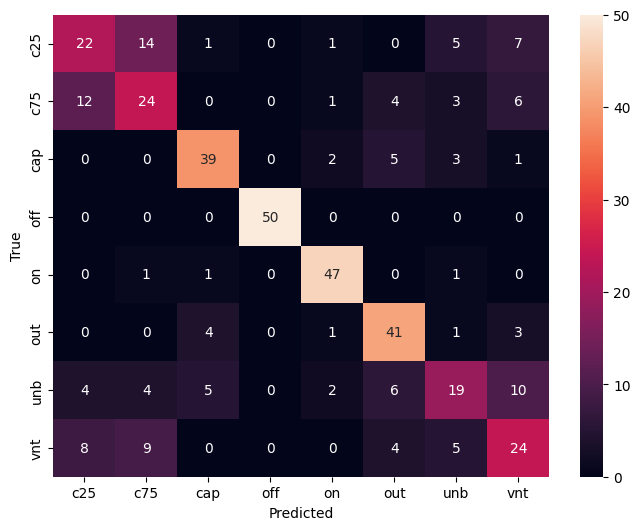

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


              precision    recall  f1-score   support

         c25       0.40      0.48      0.44        50
         c75       0.38      0.34      0.36        50
         cap       0.66      0.58      0.62        50
         off       1.00      1.00      1.00        50
          on       0.79      0.74      0.76        50
         out       0.59      0.68      0.63        50
         unb       0.24      0.20      0.22        50
         vnt       0.27      0.30      0.29        50

    accuracy                           0.54       400
   macro avg       0.54      0.54      0.54       400
weighted avg       0.54      0.54      0.54       400



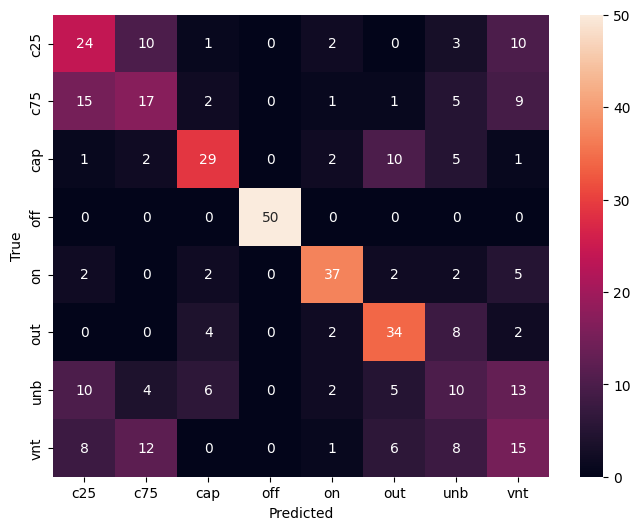

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


              precision    recall  f1-score   support

         c25       0.47      0.46      0.46        50
         c75       0.46      0.42      0.44        50
         cap       0.84      0.74      0.79        50
         off       1.00      1.00      1.00        50
          on       0.92      0.96      0.94        50
         out       0.75      0.82      0.78        50
         unb       0.49      0.52      0.50        50
         vnt       0.45      0.46      0.46        50

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.67       400
weighted avg       0.67      0.67      0.67       400



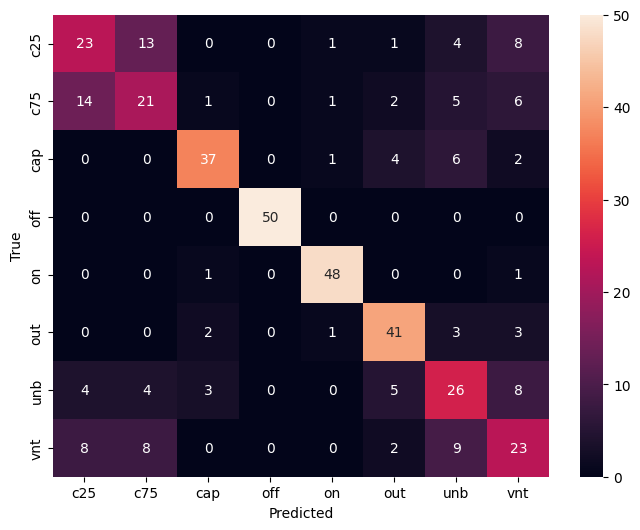

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


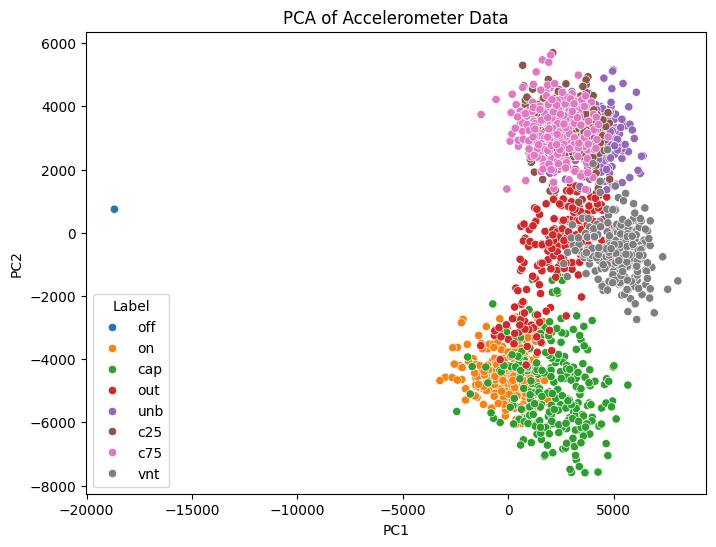

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=pc_df['PC1'], y=pc_df['PC2'], hue=pc_df['Label'], palette='tab10')
plt.title('PCA of Accelerometer Data')
plt.show()


In [83]:
errors = (y_pred != y_test).astype(int)


In [84]:
pip install librosa

  Using cached msgpack-1.1.2-cp310-cp310-win_amd64.whl.metadata (8.4 kB)
  Using cached pycparser-2.23-py3-none-any.whl.metadata (993 bytes)
Using cached msgpack-1.1.2-cp310-cp310-win_amd64.whl (71 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 24.4 MB/s  0:00:00
Using cached pycparser-2.23-py3-none-any.whl (118 kB)

   --------------- ------------------------ 3/8 [audioread]
   ------------------------- -------------- 5/8 [cffi]
   ----------------------------------- ---- 7/8 [librosa]
   ---------------------------------------- 8/8 [librosa]

Note: you may need to restart the kernel to use updated packages.


In [86]:
import librosa
y, sr = librosa.load(r"C:\Users\ismai\Downloads\archive (14)\Time Series Data\01_off_audio.wav", sr=None)

In [87]:
import numpy as np

rms = np.sqrt(np.mean(y**2))


In [88]:
noise_levels = []
for file in audio_files:  # list of all .wav files
    y, sr = librosa.load(file, sr=None)
    rms = np.sqrt(np.mean(y**2))
    noise_levels.append(rms)


NameError: name 'audio_files' is not defined